In [1]:
class MyLinearRegression:
    def __init__(self, weight=9.1,bias=3,learning_rate=0.01,
                 iterations=5):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


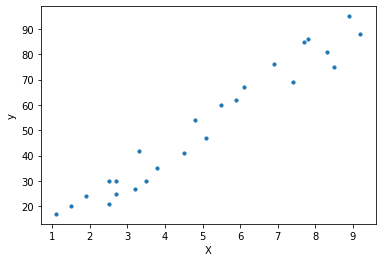

In [ ]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/8, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [9.55121619]	 Bias: [3.06726667]	 Cost: 15.58358879961457
Iteration: 1	 Weight: [9.69129389]	 Bias: [3.08561692]	 Cost: 14.929929711121483
Iteration: 2	 Weight: [9.73504726]	 Bias: [3.08883198]	 Cost: 14.866690885067442
Iteration: 3	 Weight: [9.74897899]	 Bias: [3.08736988]	 Cost: 14.860042724861309
Iteration: 4	 Weight: [9.75367713]	 Bias: [3.08446822]	 Cost: 14.858822296580565
Iteration: 5	 Weight: [9.7555154]	 Bias: [3.08112928]	 Cost: 14.858126052286119
Iteration: 6	 Weight: [9.756467]	 Bias: [3.07766331]	 Cost: 14.857484002514454
Iteration: 7	 Weight: [9.75714279]	 Bias: [3.07416633]	 Cost: 14.85685107586143
Iteration: 8	 Weight: [9.75773188]	 Bias: [3.07066804]	 Cost: 14.85622292579377
Iteration: 9	 Weight: [9.75829284]	 Bias: [3.06717762]	 Cost: 14.855599109084725
Iteration: 10	 Weight: [9.7588438]	 Bias: [3.06369786]	 Cost: 14.854979556787455
Iteration: 11	 Weight: [9.75939036]	 Bias: [3.06022961]	 Cost: 14.854364236007314
Iteration: 12	 Weight: [9.7599342

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 1813, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 1813 (delta 30), reused 76 (delta 20), pack-reused 1693
Receiving objects: 100% (1813/1813), 34.24 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (1128/1128), done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo
environment.yml  LICENSE-TEXT  README.md	 tools
LICENSE-CODE	 notebooks     requirements.txt  website


In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59658  100 59658    0     0   147k      0 --:--:-- --:--:-- --:--:--  146k


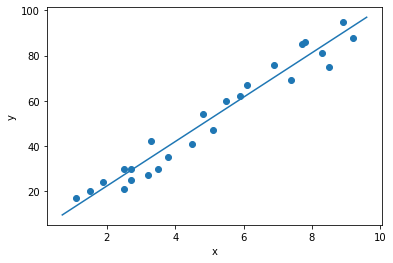

In [ ]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()